# Importing Libraries and Reading Dataset

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#reading file
df= pd.read_csv('laptop.csv')

#Data Exploration and Cleaning

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [ ]:
df.shape

(1303, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
df.nunique()

Unnamed: 0.1        1303
Unnamed: 0          1273
Company               19
TypeName               6
Inches                25
ScreenResolution      40
Cpu                  118
Ram                   10
Memory                40
Gpu                  110
OpSys                  9
Weight               189
Price                777
dtype: int64

In [ ]:
df['Unnamed: 0.1'].unique()

array([   0,    1,    2, ..., 1300, 1301, 1302])

In [ ]:
df['Unnamed: 0'].unique()

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.300e+03, 1.301e+03,
       1.302e+03])

In [ ]:
df.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)

In [ ]:
df.isnull().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [ ]:
null_df=df[df.isna().any(axis=1)]
null_df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

29

In [ ]:
df[df.duplicated()]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1274,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.3200
1275,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,38841.1200
1276,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,24455.5200
1277,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,15397.9200
1278,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,20193.1200
1279,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,47898.7200
1280,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,29303.4672
1281,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,42943.1472
1282,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.5200
1283,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496


In [ ]:
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   object 
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   object 
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   object 
 10  Price             1244 non-null   float64
dtypes: float64(1), object(10)
memory usage: 107.0+ KB


# Feature Engineering

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [ ]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
       'Workstation', 'Netbook'], dtype=object)

In [ ]:
df['Inches'].unique()

array(['13.3', '15.6', '15.4', '14', '12', '17.3', '13.5', '12.5', '13',
       '18.4', '13.9', '11.6', '25.6', '35.6', '12.3', '27.3', '24',
       '33.5', '?', '31.6', '17', '15', '14.1', '11.3', '10.1'],
      dtype=object)

In [ ]:
df[df['Inches']=='?']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
465,Dell,Workstation,?,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg,128298.24


In [ ]:
df['Inches'].value_counts()

Inches
15.6    621
14      188
17.3    162
13.3    157
12.5     38
11.6     29
12        6
13.9      6
13.5      5
12.3      5
15.4      4
15        4
35.6      3
10.1      3
24        2
13        2
18.4      1
27.3      1
33.5      1
?         1
31.6      1
17        1
14.1      1
11.3      1
25.6      1
Name: count, dtype: int64

In [ ]:
df['Inches']=df['Inches'].str.replace('?','15.6')

In [ ]:
df['Inches']= df['Inches'].astype('float')

<Axes: ylabel='Inches'>

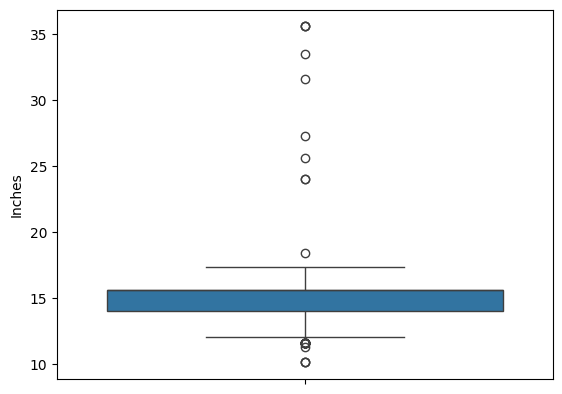

In [ ]:
sns.boxplot(df['Inches'])

In [ ]:
Q1= np.percentile(df['Inches'],25)
Q3= np.percentile(df['Inches'],75)

IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR


df['Inches'].clip(lower_limit,upper_limit,inplace=True)

<Axes: ylabel='Inches'>

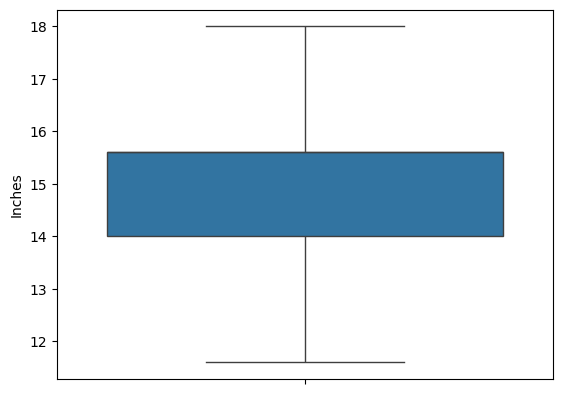

In [ ]:
sns.boxplot(df['Inches'])

In [ ]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', '1600x900',
       'IPS Panel 4K Ultra HD 3840x2160', '4K Ultra HD 3840x2160',
       'Touchscreen 1366x768', 'Touchscreen 2560x1440',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel Quad HD+ 3200x1800',
       'IPS Panel Qua

In [ ]:
df['Display']=df['ScreenResolution'].apply(lambda x: 'Full HD' if 'Full HD' in x else 'Retina Display' if 'Retina Display' in x  else '4K Ultra HD' if '4K Ultra HD' in x else 'Quad HD+' if 'Quad HD+' in x else 'Normal')

In [ ]:
df['Display'].unique()

array(['Retina Display', 'Normal', 'Full HD', 'Quad HD+', '4K Ultra HD'],
      dtype=object)

In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Display
319,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.26kg,71128.8,Full HD


In [ ]:
df['IPS']=df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [ ]:
df['IPS'].unique()

array([1, 0])

In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Display,IPS
1161,Acer,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.2kg,138474.72,Full HD,1


In [ ]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [ ]:
df['Touchscreen'].unique()

array([0, 1])

In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Display,IPS,Touchscreen
1003,HP,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.64kg,51841.44,Normal,0,0


In [ ]:
resolutions=df['ScreenResolution'].str.split('x',n=1,expand=True)
resolutions.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [ ]:
df['X_res']=resolutions[0]
df['Y_res']=resolutions[1]

In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Display,IPS,Touchscreen,X_res,Y_res
384,HP,Ultrabook,15.6,Full HD 1920x1080,AMD A9-Series 9420 3GHz,4GB,256GB SSD,AMD Radeon 520,Windows 10,1.91kg,26586.72,Full HD,0,0,Full HD 1920,1080


In [ ]:
df['X_res']=df['X_res'].str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

In [ ]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Display,IPS,Touchscreen,X_res,Y_res
821,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8GB,128GB SSD,Intel HD Graphics 620,Windows 10,2.18kg,38041.3872,Normal,0,0,1366,768


In [ ]:
df['X_res']= df['X_res'].astype('int')
df['Y_res']= df['Y_res'].astype('int')

In [ ]:
df['X_res'].unique()

array([2560, 1440, 1920, 2880, 1366, 2304, 3200, 2256, 3840, 2160, 1600,
       2736, 2400])

In [ ]:
df['Y_res'].unique()

array([1600,  900, 1080, 1800,  768, 1440, 1504, 2160, 1824, 1200])

In [ ]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [ ]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Core i5 7300HQ 2.5GHz',
       'AMD E-Series E2-9000e 1.5GHz', 'Intel Core i5 1.6GHz',
       'Intel Core i7 8650U 1.9GHz', 'Intel Atom x5-Z8300 1.44GHz',
       'AMD E-Series E2-6110 1.5GHz', 'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Celeron Dual Core N3060 1.6GHz', 'Intel Core i5 1.3GHz',
       'AMD FX 9830P 3GHz', '

In [ ]:
df['Processor']=df['Cpu'].apply(lambda x: 'Intel Core i3' if 'i3' in x else 'Intel Core i5' if 'i5' in x else 'Intel Core i7' if 'i7' in x else 'Intel Pentium' if 'Pentium' in x  else 'Intel Celeron' if 'Celeron' in x else 'Intel Atom' if 'Atom' in x else 'AMD E-Series' if 'E-Series' in x else 'AMD FX' if 'FX' in x else 'AMD Ryzen' if 'Ryzen' in x else 'AMD A4-Series' if 'A4' in x  else 'AMD A6-Series' if 'A6' in x  else 'AMD A8-Series' if 'A8' in x else 'AMD A9-Series' if 'A9' in x  else 'AMD A10-Series' if 'A10' in x  else 'AMD A12-Series' if 'A12' in x else 'Samsung Cortex' if 'Cortex' in x else 'Other Intel Processor')

In [ ]:
df['Processor'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD A9-Series', 'Intel Core i3',
       'Other Intel Processor', 'AMD E-Series', 'Intel Atom',
       'AMD A6-Series', 'Intel Celeron', 'AMD Ryzen', 'Intel Pentium',
       'AMD FX', 'AMD A10-Series', 'AMD A8-Series', 'AMD A12-Series',
       'AMD A4-Series', 'Samsung Cortex'], dtype=object)

In [ ]:
df.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Display,IPS,Touchscreen,X_res,Y_res,Processor
660,HP,2 in 1 Convertible,11.6,Intel Celeron Dual Core N3350 1.1GHz,8GB,64GB Flash Storage,Intel HD Graphics 500,Chrome OS,1.4kg,26373.6,Normal,0,1,1366,768,Intel Celeron


In [ ]:
df.drop(columns=['Cpu'],inplace=True)

In [ ]:
df['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '64GB', '6GB', '32GB', '24GB',
       '1GB'], dtype=object)

In [ ]:
df['Ram']=df['Ram'].str.replace('GB','')

In [ ]:
df['Ram']= df['Ram'].astype('int')

In [ ]:
df.sample()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Display,IPS,Touchscreen,X_res,Y_res,Processor
940,Dell,Notebook,15.6,4,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,24808.2336,Normal,0,0,1366,768,Intel Core i3


In [ ]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '128GB SSD +  1TB HDD', '256GB SSD +  256GB SSD',
       '64GB Flash Storage', '32GB Flash Storage', '256GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD +  1TB HDD', '1TB SSD',
       '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '?', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [ ]:
df['Memory'].value_counts()

Memory
256GB SSD                        401
1TB HDD                          209
500GB HDD                        121
512GB SSD                        112
128GB SSD +  1TB HDD              92
128GB SSD                         72
256GB SSD +  1TB HDD              71
32GB Flash Storage                35
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           13
64GB Flash Storage                12
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          4
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [ ]:
df[df['Memory']=='?']

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Display,IPS,Touchscreen,X_res,Y_res,Processor
749,Dell,Notebook,15.6,16,?,AMD Radeon R7 M445,Windows 10,2.3kg,62938.0656,Full HD,0,0,1920,1080,Intel Core i7


In [ ]:
df['Memory']=df['Memory'].str.replace('?.','256GB SSD')

In [ ]:
df['SSD']=df['Memory'].apply(lambda x: 8 if '8GB SSD' in x else 16 if '16GB SSD' in x else 32 if '32GB SSD' in x else 64 if '64GB SSD' in x else 128 if '128GB SSD' in x else 180 if '180GB SSD' in x else 240 if '240GB SSD'in x else 256 if '256GB SSD' in x else 512 if '512GB SSD' in x else 1024 if '1TB SSD' in x else 0)

In [ ]:
df['SSD'].unique()

array([   8,    0,  256,  512,   32,   64, 1024,   16,  180,  240])

In [ ]:
df['HDD']=df['Memory'].apply(lambda x: 32 if '32GB HDD'in x else 128 if ' 128GB HDD' in x  else 500 if '500GB HDD' in x else 1000 if '1TB HDD' in x else 1000 if '1.0TB HDD' in x else 2000 if '2TB HDD' in x else 0)

In [ ]:
df['HDD'].unique()

array([   0,  500, 1000, 2000,   32])

In [ ]:
df['Flash_Storage']=df['Memory'].apply(lambda x: 16 if '16GB Flash' in x else 32 if '32GB Flash' in x else 64 if '64GB Flash' in x else 128 if '128GB Flash' in x else 256 if '256GB Flash' in x else 512 if '512GB Flash' in x else 0)

In [ ]:
df['Flash_Storage'].unique()

array([  0, 128, 256,  64,  32,  16, 512])

In [ ]:
df['Hybrid_Storage']=df['Memory'].apply(lambda x: 508 if '508GB Hybrid' in x else 1000 if '1.0TB Hybrid' in x else 0)

In [ ]:
df['Hybrid_Storage'].unique()

array([   0, 1000,  508])

In [ ]:
df.sample()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Display,IPS,Touchscreen,X_res,Y_res,Processor,SSD,HDD,Flash_Storage,Hybrid_Storage
707,Lenovo,Notebook,15.6,4,1TB HDD,Intel HD Graphics 620,No OS,1.9kg,26101.872,Normal,0,0,1366,768,Intel Core i5,0,1000,0,0


In [ ]:
df.drop(columns=['Memory'],inplace=True)

In [ ]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1050', 'AMD Radeon R2',
       'AMD Radeon 530', 'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Intel HD Graphics 400', 'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvidia GeFo

In [ ]:
df['Gpu_Brand']=df['Gpu'].apply(lambda x: x.split()[0])

In [ ]:
df['Gpu_Brand'].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

In [ ]:
df.drop(columns=['Gpu'],inplace=True)

In [ ]:
df.sample()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Display,IPS,Touchscreen,X_res,Y_res,Processor,SSD,HDD,Flash_Storage,Hybrid_Storage,Gpu_Brand
157,Lenovo,Gaming,15.6,16,Windows 10,2.5kg,57489.12,Full HD,1,0,1920,1080,Intel Core i7,256,0,0,0,Nvidia


In [ ]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux',
       'Windows 10 S', 'Chrome OS', 'Windows 7', 'Android'], dtype=object)

In [ ]:
df['OpSys']=df['OpSys'].apply(lambda x: 'Windows 11' if 'Windows 10 S' in x else 'macOS' if 'Mac OS X' in x else x)

In [ ]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Linux', 'Windows 11', 'Chrome OS',
       'Windows 7', 'Android'], dtype=object)

In [ ]:
df['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '2.5kg', '1.62kg', '1.91kg',
       '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg', '2.71kg', '1.2kg',
       '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg', '3.2kg', '1.49kg',
       '2.4kg', '2.13kg', '2.43kg', '1.7kg', '1.4kg', '1.8kg', '1.9kg',
       '3kg', '1.252kg', '2.7kg', '2.02kg', '1.63kg', '1.96kg', '1.21kg',
       '2.45kg', '1.25kg', '1.5kg', '2.62kg', '1.38kg', '1.58kg',
       '1.85kg', '1.23kg', '2.16kg', '2.36kg', '7.2kg', '2.05kg',
       '1.32kg', '1.75kg', '0.97kg', '2.56kg', '1.48kg', '1.74kg',
       '1.1kg', '1.56kg', '2.03kg', '1.05kg', '5.4kg', '4.4kg', '1.90kg',
       '1.29kg', '2.0kg', '1.95kg', '2.06kg', '1.12kg', '3.49kg',
       '3.35kg', '2.23kg', '?', '2.9kg', '4.42kg', '2.69kg', '2.37kg',
       '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg', '1.41kg', '4.14kg',
       '2.18kg', '2.24kg', '2.67kg', '4.1kg', '2.14kg', '1.36kg',
       '

In [ ]:
df[df['Weight']=='?']

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Display,IPS,Touchscreen,X_res,Y_res,Processor,SSD,HDD,Flash_Storage,Hybrid_Storage,Gpu_Brand
201,Dell,Ultrabook,13.3,8,Windows 10,?,77202.72,Full HD,0,0,1920,1080,Intel Core i7,256,0,0,0,Intel


In [ ]:
df['Weight'].value_counts()

Weight
2.2kg     106
2.1kg      57
2.4kg      41
2.5kg      37
2.3kg      37
         ... 
1.41kg      1
3.6kg       1
4.7kg       1
4.33kg      1
4.0kg       1
Name: count, Length: 189, dtype: int64

In [ ]:
df['Weight']=df['Weight'].str.replace('?','2.2kg')
df['Weight']=df['Weight'].str.replace('kg','')

In [ ]:
df['Weight']=df['Weight'].astype('float')

<Axes: ylabel='Weight'>

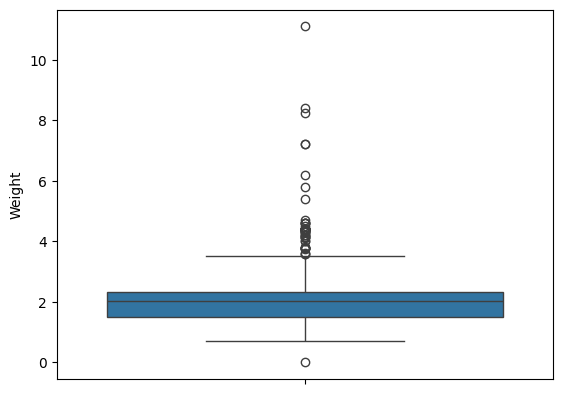

In [ ]:
sns.boxplot(df['Weight'])

In [ ]:
Q1=df['Weight'].quantile(0.25)
Q3=df['Weight'].quantile(0.75)

IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

df['Weight'].clip(lower_limit,upper_limit,inplace=True)

<Axes: ylabel='Weight'>

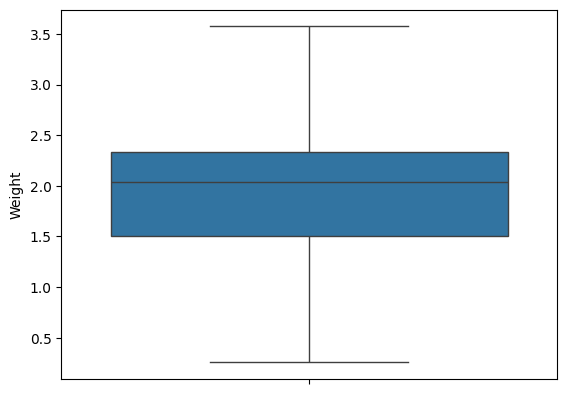

In [ ]:
sns.boxplot(df['Weight'])

In [ ]:
df.sample()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Display,IPS,Touchscreen,X_res,Y_res,Processor,SSD,HDD,Flash_Storage,Hybrid_Storage,Gpu_Brand
12,Apple,Ultrabook,15.4,16,macOS,1.83,130001.6016,Retina Display,1,0,2880,1800,Intel Core i7,256,0,0,0,AMD


In [ ]:
df=df[['Company','TypeName','OpSys','Processor','Inches', 'Display', 'IPS', 'Touchscreen', 'X_res', 'Y_res',  'Ram', 'SSD', 'HDD', 'Flash_Storage', 'Hybrid_Storage', 'Gpu_Brand', 'Weight','Price']]

In [ ]:
df.describe(include='all')

,Company,TypeName,OpSys,Processor,Inches,Display,IPS,Touchscreen,X_res,Y_res,Ram,SSD,HDD,Flash_Storage,Hybrid_Storage,Gpu_Brand,Weight,Price
count,1244,1244,1244,1244,1244.000000,1244,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244,1244.000000,1244.000000
unique,19,6,8,17,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
top,Lenovo,Notebook,Windows 10,Intel Core i7,NaN,Full HD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel,NaN,NaN
freq,282,689,1022,503,NaN,816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,684,NaN,NaN
mean,NaN,NaN,NaN,NaN,15.053698,NaN,0.282154,0.145498,1900.022508,1073.926045,8.528135,168.778135,413.610932,4.540193,7.643087,NaN,2.031990,60606.224427
std,NaN,NaN,NaN,NaN,1.432423,NaN,0.450229,0.352744,492.829517,283.731181,5.586878,194.086574,517.540259,30.802474,85.963348,NaN,0.616605,37424.636161
min,NaN,NaN,NaN,NaN,11.600000,NaN,0.000000,0.000000,1366.000000,768.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.255000,9270.720000
25%,NaN,NaN,NaN,NaN,14.000000,NaN,0.000000,0.000000,1920.000000,1080.000000,4.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.500000,32655.445200
50%,NaN,NaN,NaN,NaN,15.600000,NaN,0.000000,0.000000,1920.000000,1080.000000,8.000000,256.000000,0.000000,0.000000,0.000000,NaN,2.040000,52693.920000
75%,NaN,NaN,NaN,NaN,15.600000,NaN,1.000000,0.000000,1920.000000,1080.000000,8.000000,256.000000,1000.000000,0.000000,0.000000,NaN,2.330000,79813.440000


In [ ]:
df.head()

,Company,TypeName,OpSys,Processor,Inches,Display,IPS,Touchscreen,X_res,Y_res,Ram,SSD,HDD,Flash_Storage,Hybrid_Storage,Gpu_Brand,Weight,Price
0,Apple,Ultrabook,macOS,Intel Core i5,13.3,Retina Display,1,0,2560,1600,8,8,0,0,0,Intel,1.37,71378.6832
1,Apple,Ultrabook,macOS,Intel Core i5,13.3,Normal,0,0,1440,900,8,0,0,128,0,Intel,1.34,47895.5232
2,HP,Notebook,No OS,Intel Core i5,15.6,Full HD,0,0,1920,1080,8,256,0,0,0,Intel,1.86,30636.0000
3,Apple,Ultrabook,macOS,Intel Core i7,15.4,Retina Display,1,0,2880,1800,16,512,0,0,0,AMD,1.83,135195.3360
4,Apple,Ultrabook,macOS,Intel Core i5,13.3,Retina Display,1,0,2560,1600,8,256,0,0,0,Intel,1.37,96095.8080


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1244 non-null   object 
 1   TypeName        1244 non-null   object 
 2   OpSys           1244 non-null   object 
 3   Processor       1244 non-null   object 
 4   Inches          1244 non-null   float64
 5   Display         1244 non-null   object 
 6   IPS             1244 non-null   int64  
 7   Touchscreen     1244 non-null   int64  
 8   X_res           1244 non-null   int64  
 9   Y_res           1244 non-null   int64  
 10  Ram             1244 non-null   int64  
 11  SSD             1244 non-null   int64  
 12  HDD             1244 non-null   int64  
 13  Flash_Storage   1244 non-null   int64  
 14  Hybrid_Storage  1244 non-null   int64  
 15  Gpu_Brand       1244 non-null   object 
 16  Weight          1244 non-null   float64
 17  Price           1244 non-null   f

#Data Visualization

In [ ]:
df.columns

Index(['Company', 'TypeName', 'OpSys', 'Processor', 'Inches', 'Display', 'IPS',
       'Touchscreen', 'X_res', 'Y_res', 'Ram', 'SSD', 'HDD', 'Flash_Storage',
       'Hybrid_Storage', 'Gpu_Brand', 'Weight', 'Price'],
      dtype='object')

Univariate & Bivariate Analysis

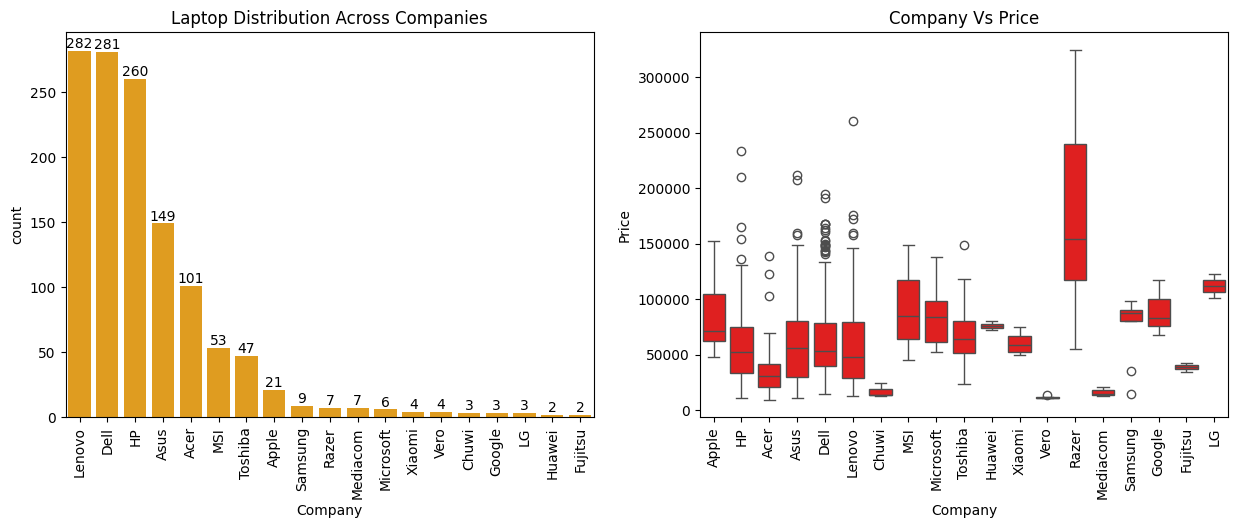

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax=sns.countplot(data=df, x='Company', color='orange', order=df['Company'].value_counts().index)
plt.title('Laptop Distribution Across Companies')

for count in ax.containers:
  ax.bar_label(count)
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
sns.boxplot(x=df["Company"],y=df["Price"], color='red')
plt.title('Company Vs Price')
plt.xticks(rotation="vertical")

plt.show()

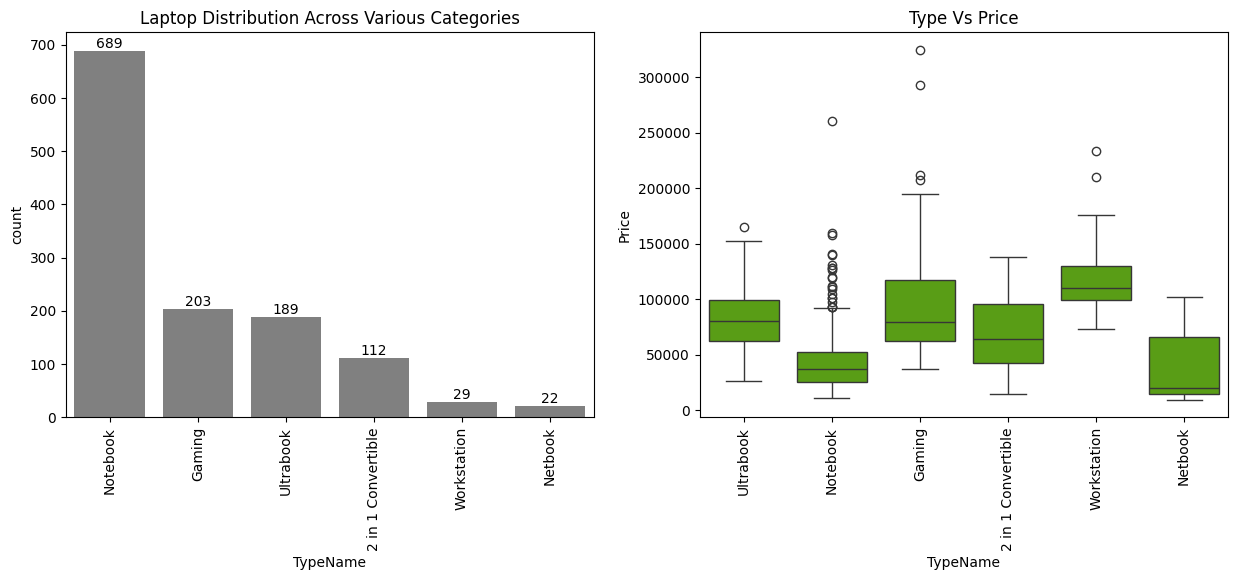

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax=sns.countplot(data=df, x='TypeName', color='grey', order=df['TypeName'].value_counts().index)
plt.title('Laptop Distribution Across Various Categories')

for count in ax.containers:
  ax.bar_label(count)
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
sns.boxplot(x=df["TypeName"],y=df["Price"], color='#59b300')
plt.title('Type Vs Price')
plt.xticks(rotation="vertical")

plt.show()

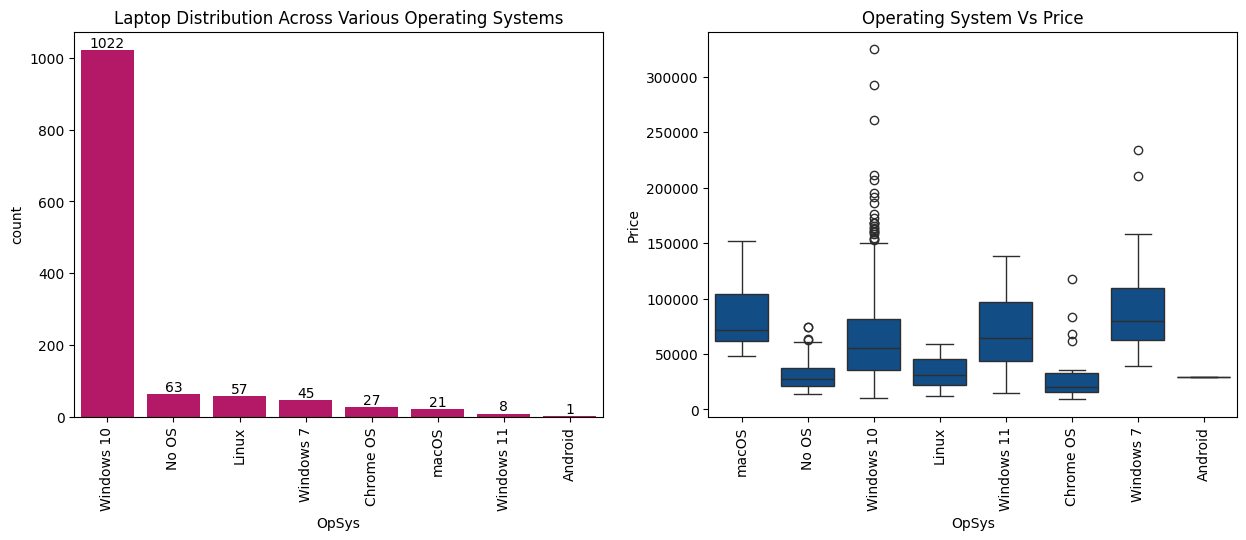

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax=sns.countplot(data=df, x='OpSys', color='#cc0066', order= df['OpSys'].value_counts().index)
plt.title('Laptop Distribution Across Various Operating Systems')

for count in ax.containers:
  ax.bar_label(count)
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
sns.boxplot(x=df["OpSys"],y=df["Price"], color='#004d99')
plt.title('Operating System Vs Price')
plt.xticks(rotation="vertical")

plt.show()

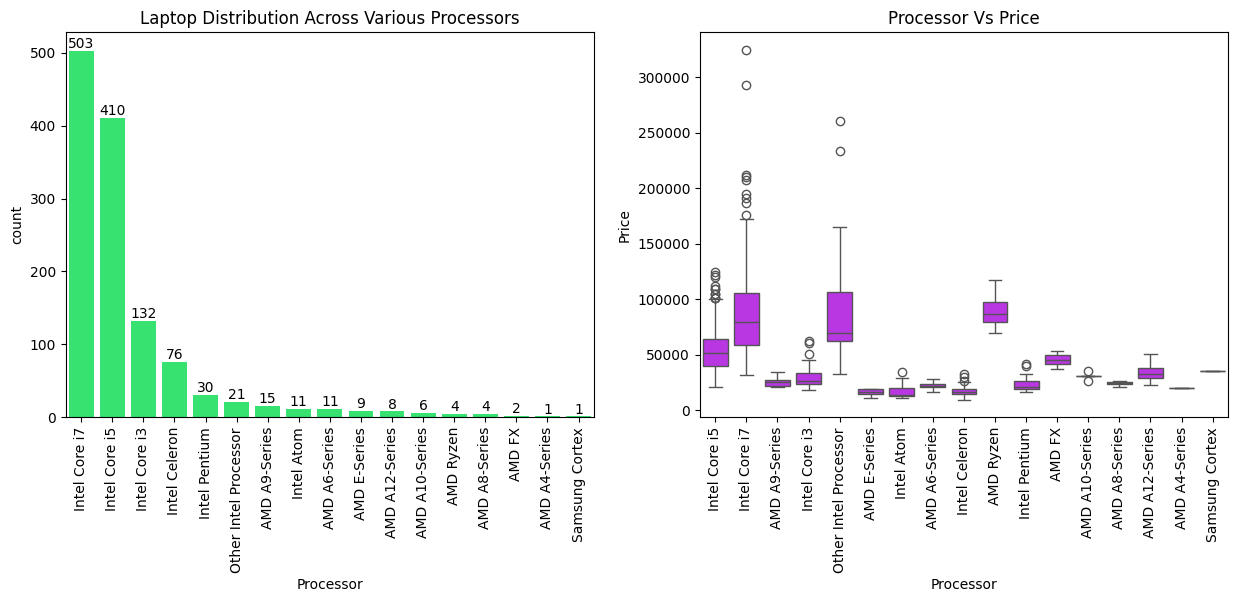

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax=sns.countplot(data=df, x='Processor', color='#1aff66', order=df['Processor'].value_counts().index)
plt.title('Laptop Distribution Across Various Processors')

for count in ax.containers:
  ax.bar_label(count)
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
sns.boxplot(x=df["Processor"],y=df["Price"], color='#c61aff')
plt.title('Processor Vs Price')
plt.xticks(rotation="vertical")

plt.show()

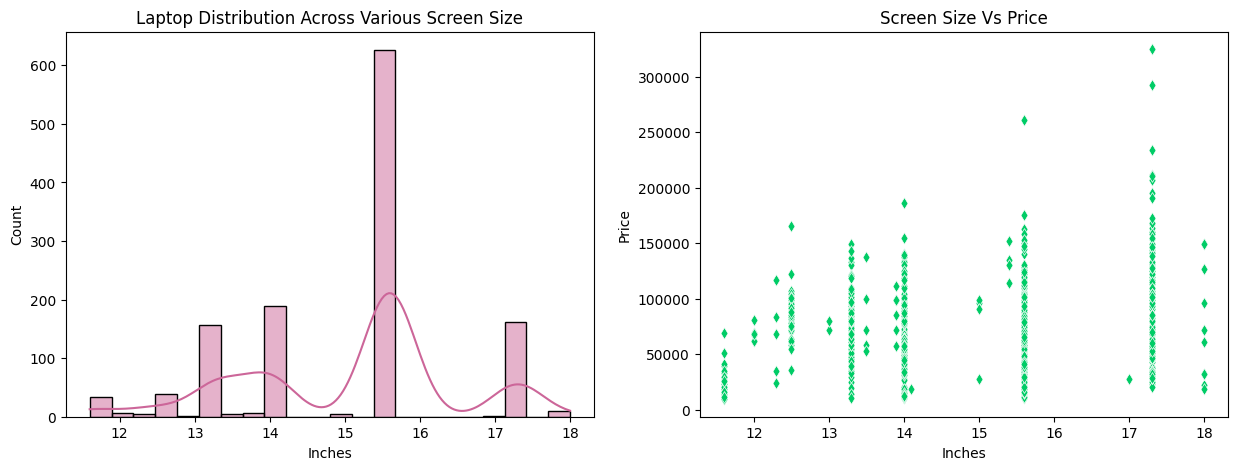

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(df['Inches'],kde=True,color='#cc6699')
plt.title('Laptop Distribution Across Various Screen Size')

plt.subplot(1,2,2)
sns.scatterplot(data=df,x="Inches",y="Price",color='#00cc66',marker='d')
plt.title('Screen Size Vs Price')

plt.show()


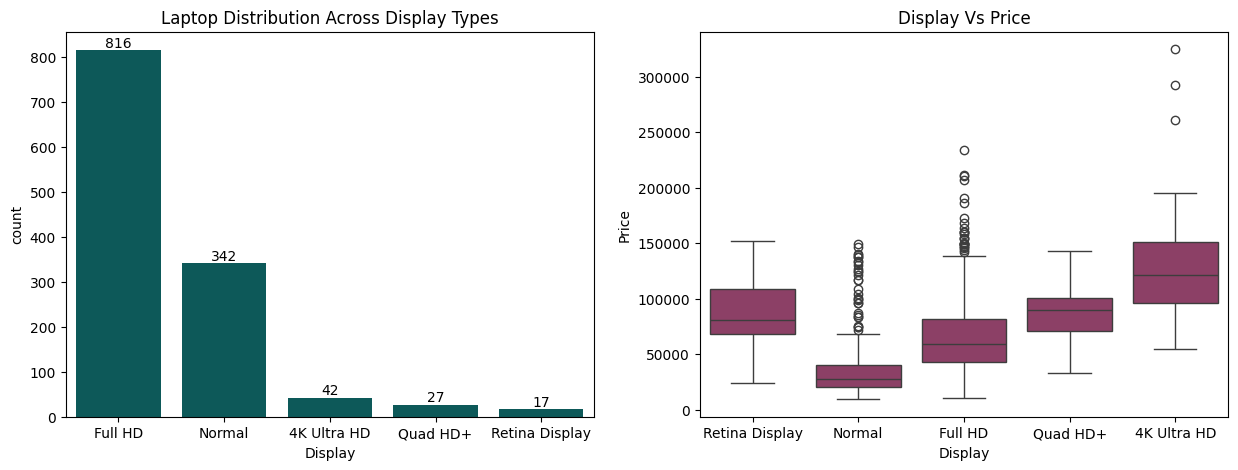

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax=sns.countplot(data=df, x='Display', color='#006666',order=df['Display'].value_counts().index)
plt.title('Laptop Distribution Across Display Types')

for count in ax.containers:
  ax.bar_label(count)

plt.subplot(1,2,2)
sns.boxplot(x=df["Display"],y=df["Price"], color='#993366')
plt.title('Display Vs Price')

plt.show()


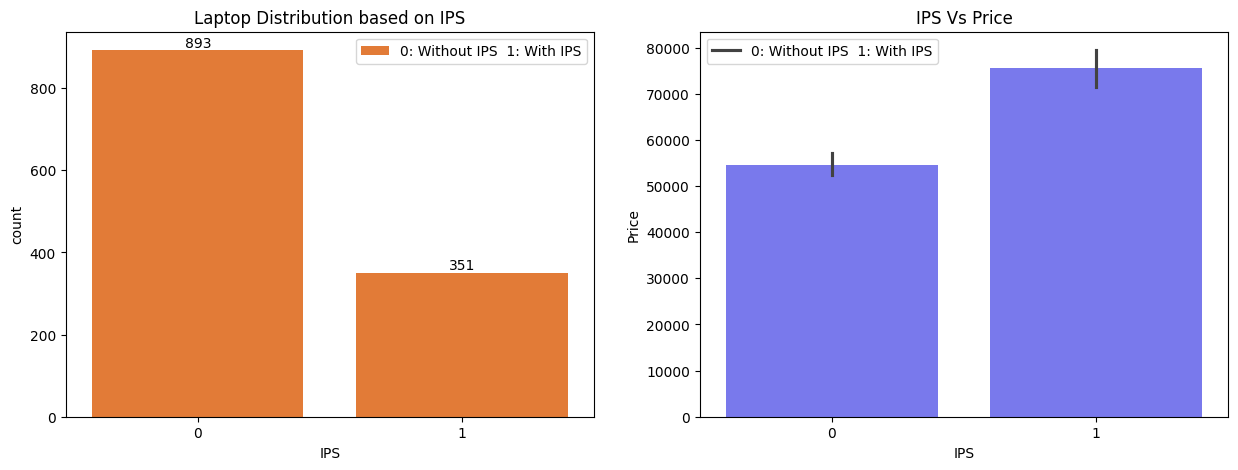

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax=sns.countplot(data=df, x='IPS', color='#ff751a',)
plt.title('Laptop Distribution based on IPS')
plt.legend(labels=['0: Without IPS  1: With IPS'])

for count in ax.containers:
  ax.bar_label(count)

plt.subplot(1,2,2)
sns.barplot(x=df["IPS"],y=df["Price"], color='#6666ff')
plt.legend(labels=['0: Without IPS  1: With IPS'])
plt.title('IPS Vs Price')

plt.show()


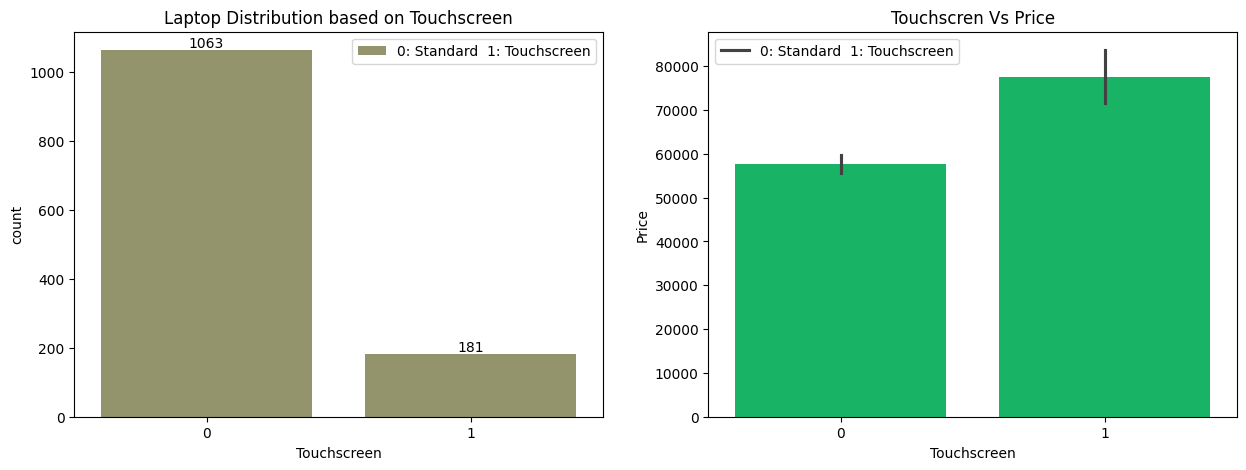

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax=sns.countplot(data=df, x='Touchscreen', color='#999966')
plt.title('Laptop Distribution based on Touchscreen')
plt.legend(labels=['0: Standard  1: Touchscreen'])

for count in ax.containers:
  ax.bar_label(count)

plt.subplot(1,2,2)
sns.barplot(x=df["Touchscreen"],y=df["Price"], color='#00cc66')
plt.legend(labels=['0: Standard  1: Touchscreen'])
plt.title('Touchscren Vs Price')

plt.show()

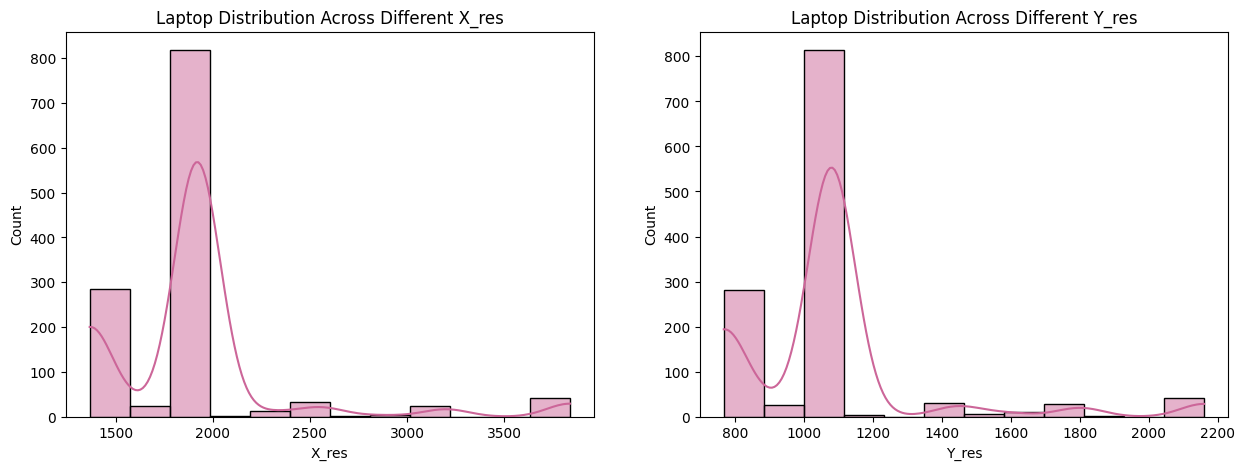

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df['X_res'],kde=True,color='#cc6699')
plt.title('Laptop Distribution Across Different X_res')

plt.subplot(1,2,2)
sns.histplot(df['Y_res'],kde=True,color='#cc6699')
plt.title('Laptop Distribution Across Different Y_res')

plt.show()

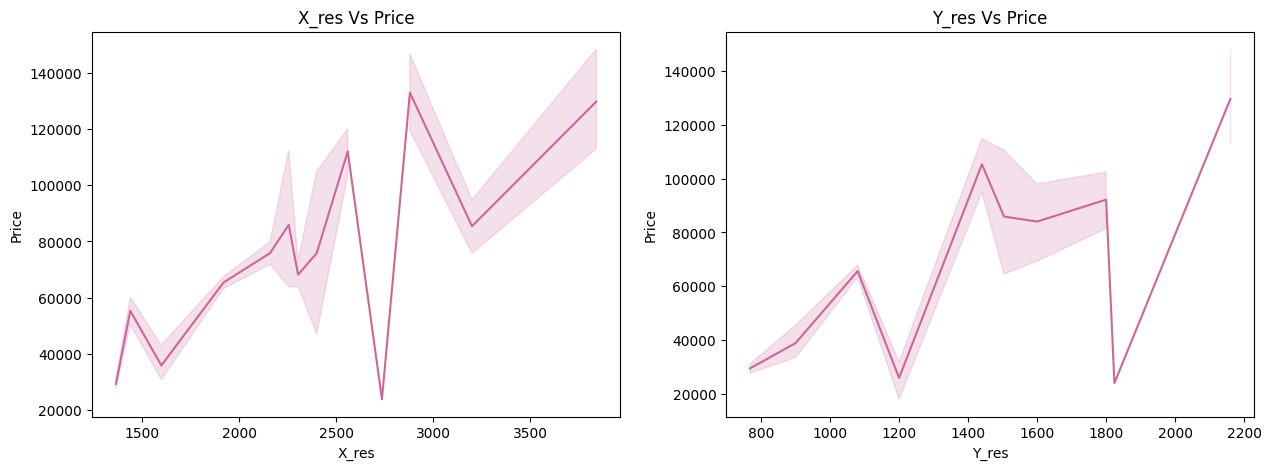

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.lineplot(x=df['X_res'],y=df['Price'],color='#cc6699')
plt.title('X_res Vs Price')

plt.subplot(1,2,2)
sns.lineplot(x=df['Y_res'],y=df['Price'],color='#cc6699')
plt.title('Y_res Vs Price')

plt.show()

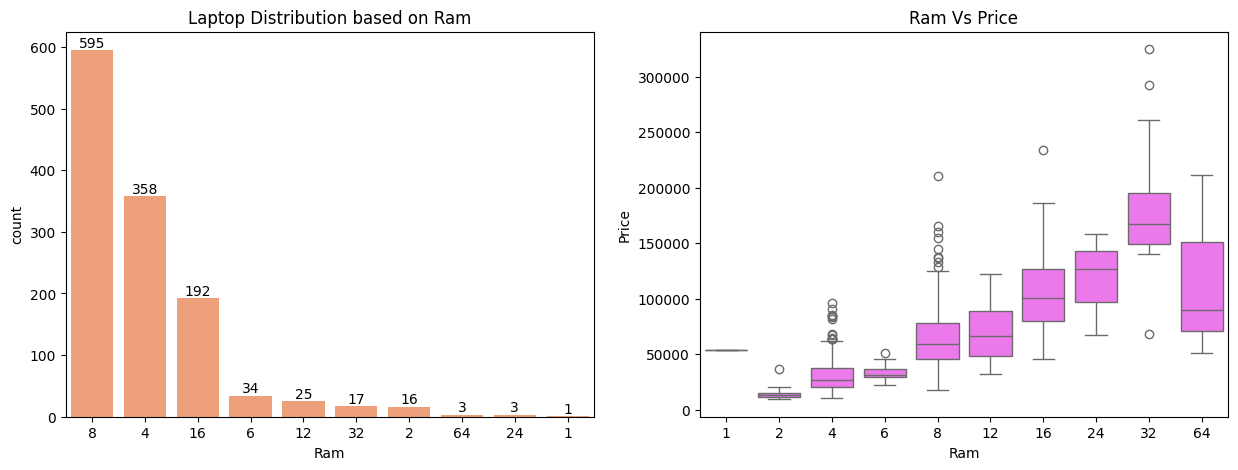

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax=sns.countplot(data=df, x='Ram', color='#ff9966', order=df['Ram'].value_counts().index)
plt.title('Laptop Distribution based on Ram')

for count in ax.containers:
  ax.bar_label(count)

plt.subplot(1,2,2)
sns.boxplot(x=df["Ram"],y=df["Price"], color='#ff66ff')
plt.title('Ram Vs Price')

plt.show()

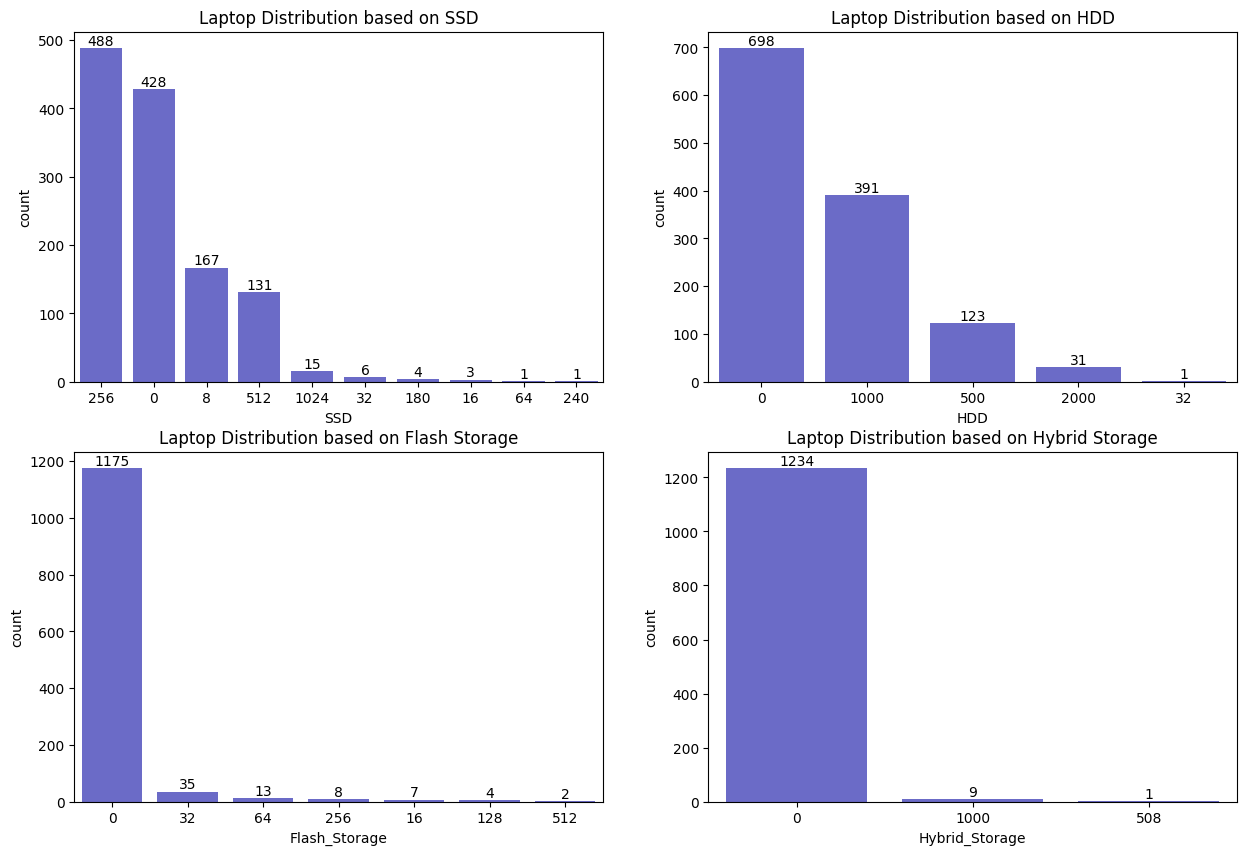

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
ax=sns.countplot(data=df, x='SSD',color='#5c5cd6',order=df['SSD'].value_counts().index)
plt.title('Laptop Distribution based on SSD')

for count in ax.containers:
  ax.bar_label(count)

plt.subplot(2,2,2)
ax=sns.countplot(data=df, x='HDD',color='#5c5cd6',order=df['HDD'].value_counts().index)
plt.title('Laptop Distribution based on HDD')

for count in ax.containers:
  ax.bar_label(count)

plt.subplot(2,2,3)
ax=sns.countplot(data=df, x='Flash_Storage',color='#5c5cd6',order=df['Flash_Storage'].value_counts().index)
plt.title('Laptop Distribution based on Flash Storage')

for count in ax.containers:
  ax.bar_label(count)

plt.subplot(2,2,4)
ax=sns.countplot(data=df, x='Hybrid_Storage',color='#5c5cd6',order=df['Hybrid_Storage'].value_counts().index)
plt.title('Laptop Distribution based on Hybrid Storage')

for count in ax.containers:
  ax.bar_label(count)

plt.show()

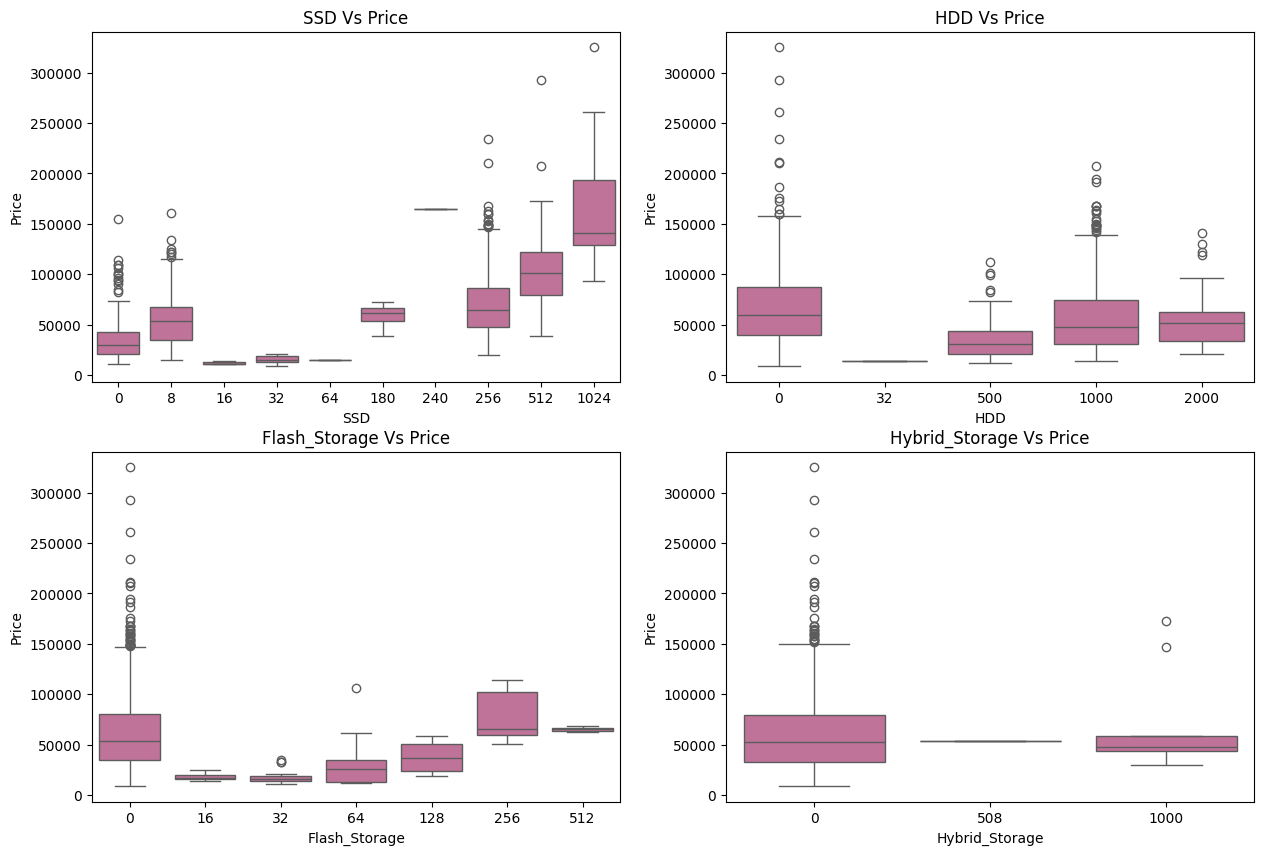

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(x=df['SSD'],y=df['Price'],color='#cc6699')
plt.title('SSD Vs Price')

plt.subplot(2,2,2)
sns.boxplot(x=df['HDD'],y=df['Price'],color='#cc6699')
plt.title('HDD Vs Price')

plt.subplot(2,2,3)
sns.boxplot(x=df['Flash_Storage'],y=df['Price'],color='#cc6699')
plt.title('Flash_Storage Vs Price')

plt.subplot(2,2,4)
sns.boxplot(x=df['Hybrid_Storage'],y=df['Price'],color='#cc6699')
plt.title('Hybrid_Storage Vs Price')

plt.show()



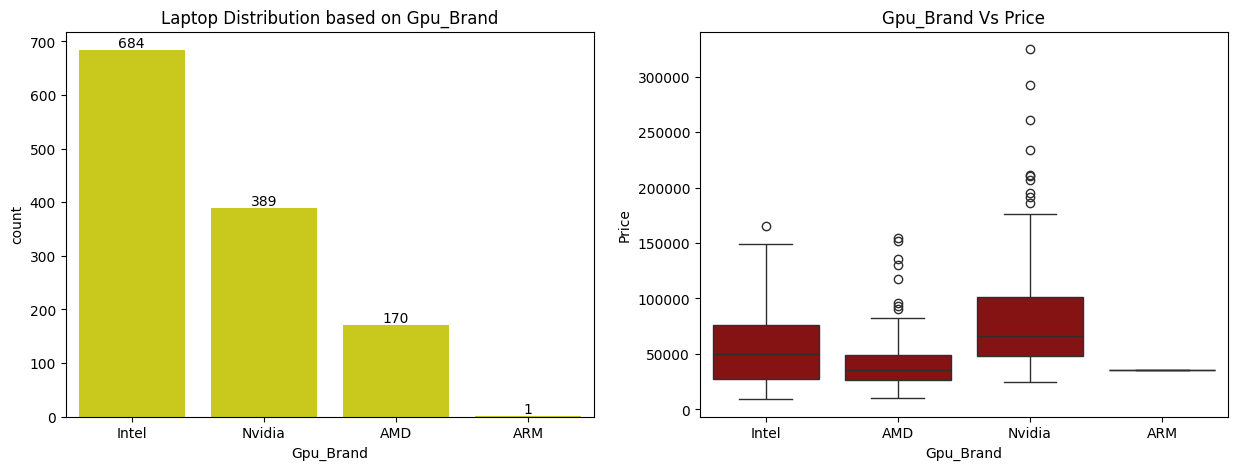

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax=sns.countplot(data=df, x='Gpu_Brand',color='#e6e600', order= df['Gpu_Brand'].value_counts().index)
plt.title('Laptop Distribution based on Gpu_Brand')

for count in ax.containers:
  ax.bar_label(count)

plt.subplot(1,2,2)
sns.boxplot(x=df['Gpu_Brand'],y=df['Price'],color='#990000')
plt.title('Gpu_Brand Vs Price')

plt.show()

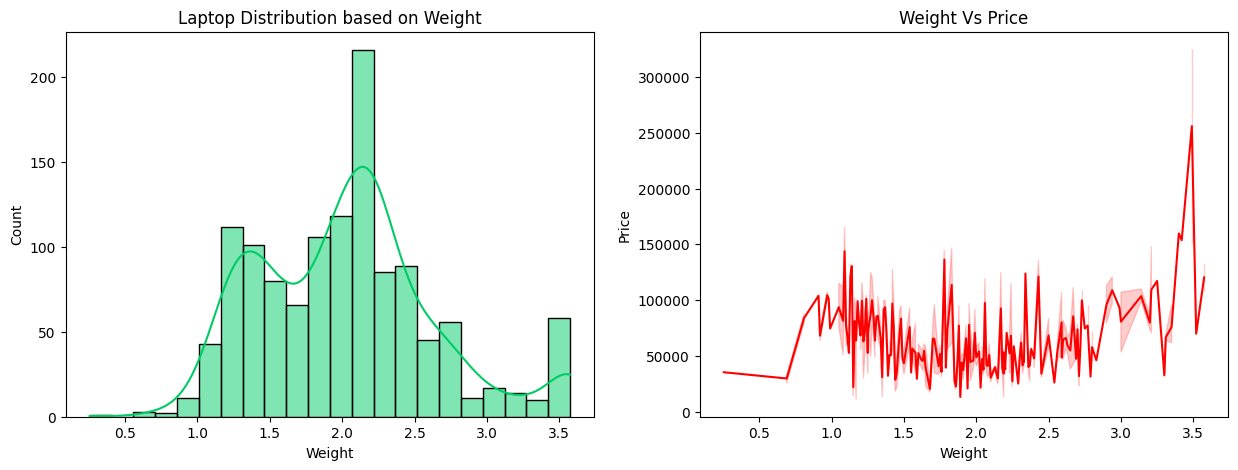

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(df['Weight'],kde=True,color='#00cc66')
plt.title('Laptop Distribution based on Weight')

plt.subplot(1,2,2)
sns.lineplot(x=df['Weight'],y=df['Price'],color='red')
plt.title('Weight Vs Price')
plt.show()

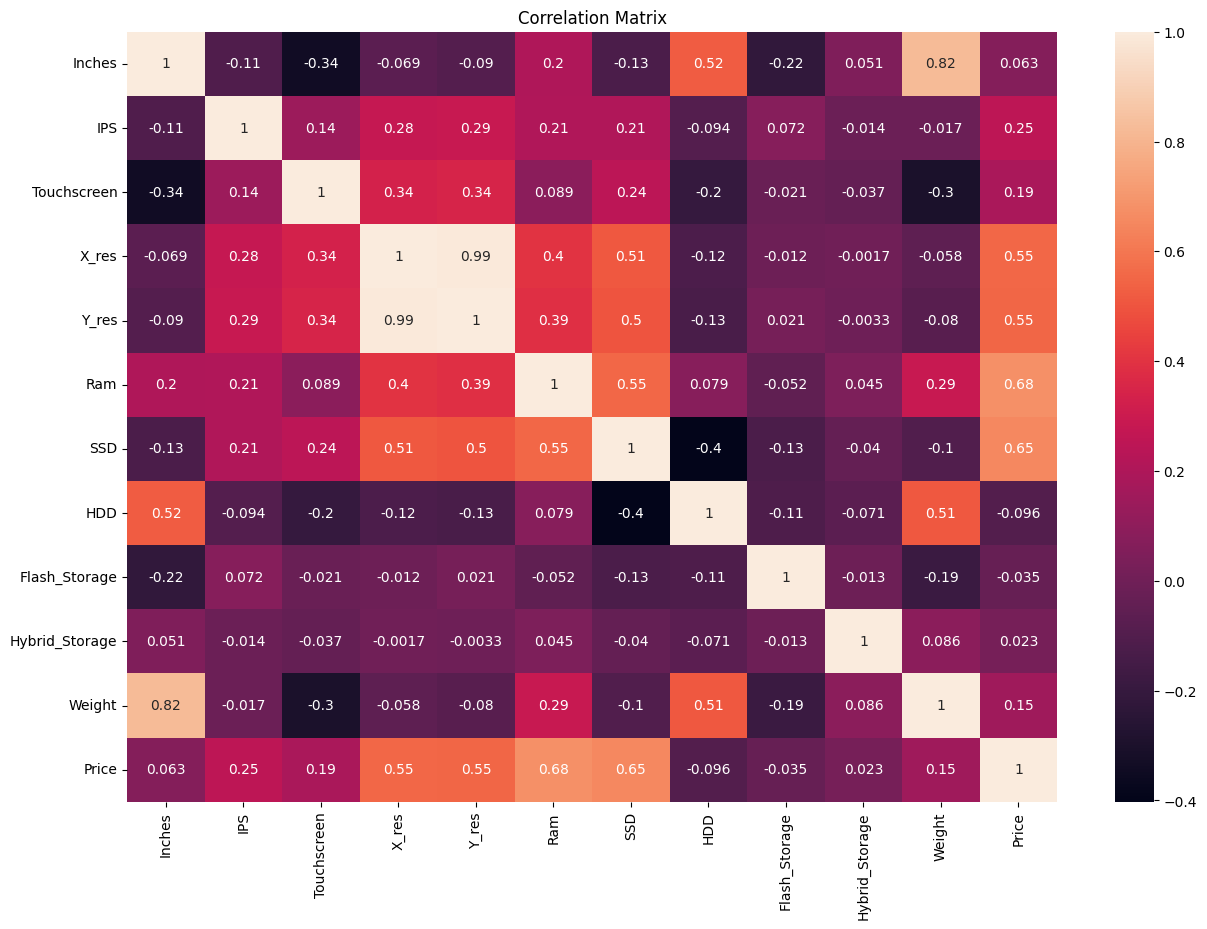

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title('Correlation Matrix')
plt.show()

Skewness 1.52


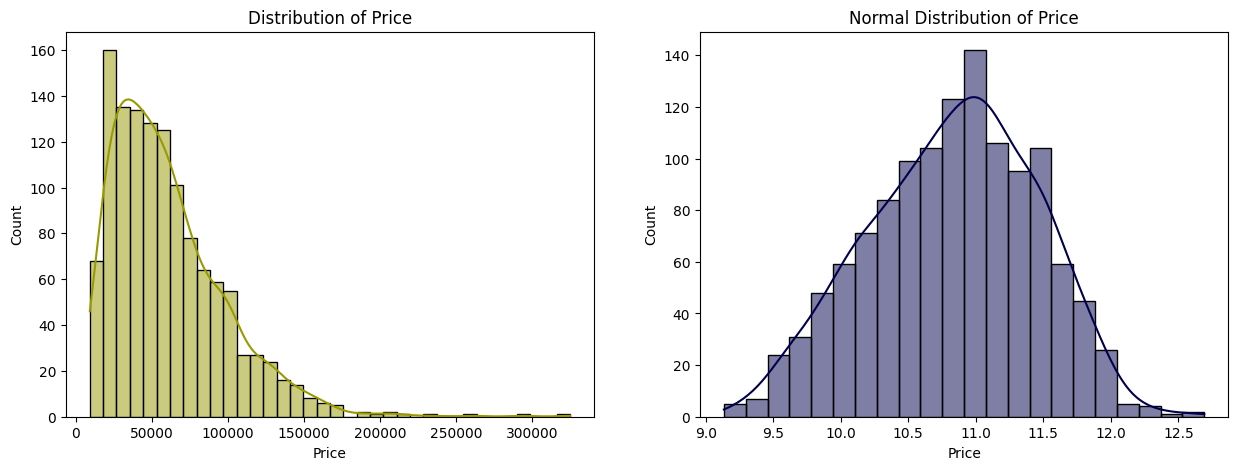

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x=df['Price'],kde=True,color='#999900')
plt.title('Distribution of Price')

print('Skewness',round(df['Price'].skew(),2))


plt.subplot(1,2,2)
sns.histplot(data=np.log(df['Price']),kde=True,color='#00004d')
plt.title('Normal Distribution of Price')

plt.show()

#Feature Selection

In [ ]:
df.corr(numeric_only=True)['Price']

Inches            0.063368
IPS               0.252956
Touchscreen       0.186393
X_res             0.553040
Y_res             0.549308
Ram               0.681922
SSD               0.653974
HDD              -0.096023
Flash_Storage    -0.034947
Hybrid_Storage    0.022505
Weight            0.154274
Price             1.000000
Name: Price, dtype: float64

In [ ]:
df.drop(columns=['HDD','Flash_Storage'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1244 non-null   object 
 1   TypeName        1244 non-null   object 
 2   OpSys           1244 non-null   object 
 3   Processor       1244 non-null   object 
 4   Inches          1244 non-null   float64
 5   Display         1244 non-null   object 
 6   IPS             1244 non-null   int64  
 7   Touchscreen     1244 non-null   int64  
 8   X_res           1244 non-null   int64  
 9   Y_res           1244 non-null   int64  
 10  Ram             1244 non-null   int64  
 11  SSD             1244 non-null   int64  
 12  Hybrid_Storage  1244 non-null   int64  
 13  Gpu_Brand       1244 non-null   object 
 14  Weight          1244 non-null   float64
 15  Price           1244 non-null   float64
dtypes: float64(3), int64(7), object(6)
memory usage: 155.6+ KB


#Model Selection

In [ ]:
X=df.drop(columns=['Price'])
y=np.log(df['Price'])

In [ ]:
X.head()

,Company,TypeName,OpSys,Processor,Inches,Display,IPS,Touchscreen,X_res,Y_res,Ram,SSD,Hybrid_Storage,Gpu_Brand,Weight
0,Apple,Ultrabook,macOS,Intel Core i5,13.3,Retina Display,1,0,2560,1600,8,8,0,Intel,1.37
1,Apple,Ultrabook,macOS,Intel Core i5,13.3,Normal,0,0,1440,900,8,0,0,Intel,1.34
2,HP,Notebook,No OS,Intel Core i5,15.6,Full HD,0,0,1920,1080,8,256,0,Intel,1.86
3,Apple,Ultrabook,macOS,Intel Core i7,15.4,Retina Display,1,0,2880,1800,16,512,0,AMD,1.83
4,Apple,Ultrabook,macOS,Intel Core i5,13.3,Retina Display,1,0,2560,1600,8,256,0,Intel,1.37


In [ ]:
y.head()

0    11.175755
1    10.776777
2    10.329931
3    11.814476
4    11.473101
Name: Price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=2)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,VotingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

#Lasso Regression

In [ ]:
step_1= ColumnTransformer(transformers=[
    ('Col_tnf1', OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,5,13]),
    ('Col_tnf2',StandardScaler(),[4,6,7,8,9,10,11,12,14])
    ],remainder='passthrough')

step_2= Lasso(alpha=0.0001)

pipe= Pipeline([
    ('step_1',step_1),
    ('step_2',step_2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2_score 0.785978336772504
MAE 0.2109302027038523
MSE 0.08115819146775324


#Linear Regression

In [ ]:
step_1= ColumnTransformer(transformers=[
    ('Col_tnf1', OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,5,13]),
    ('Col_tnf2',StandardScaler(),[4,6,7,8,9,10,11,12,14])
    ],remainder='passthrough')

step_2= LinearRegression()

pipe= Pipeline([
    ('step_1',step_1),
    ('step_2',step_2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2_score 0.7862690641457517
MAE 0.21248611907481976
MSE 0.08104794604928889


#Ridge Regression

In [ ]:
step_1= ColumnTransformer(transformers=[
    ('Col_tnf1', OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,5,13]),
    ('Col_tnf2',StandardScaler(),[4,6,7,8,9,10,11,12,14])
    ],remainder='passthrough')

step_2= Ridge(alpha=0.0)

pipe= Pipeline([
    ('step_1',step_1),
    ('step_2',step_2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2_score 0.7872248050496602
MAE 0.21281332053768184
MSE 0.08068552384350255


#KNN

In [ ]:
step_1= ColumnTransformer(transformers=[
    ('Col_tnf1', OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,5,13]),
    ('Col_tnf2',MinMaxScaler(),[4,6,7,8,9,10,11,12,14])
    ],remainder='passthrough')

step_2= KNeighborsRegressor(n_neighbors=9)

pipe= Pipeline([
    ('step_1',step_1),
    ('step_2',step_2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2_score 0.7783920163511326
MAE 0.22737840849135663
MSE 0.08403496588399038


#Decisoion Tree

In [ ]:
step_1= ColumnTransformer(transformers=[
    ('Col_tnf1', OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,5,13]),
    ('Col_tnf2',MinMaxScaler(),[4,6,7,8,9,10,11,12,14])
    ],remainder='passthrough')

step_2= DecisionTreeRegressor(max_depth=10)

pipe= Pipeline([
    ('step_1',step_1),
    ('step_2',step_2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2_score 0.7633890538071723
MAE 0.22767101702526243
MSE 0.08972417177261109


#SVM

In [ ]:
step_1= ColumnTransformer(transformers=[
    ('Col_tnf1', OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,5,13]),
    ('Col_tnf2',StandardScaler(),[4,6,7,8,9,10,11,12,14])
    ],remainder='passthrough')

step_2= SVR(kernel='rbf',C=100,epsilon=0.2)

pipe= Pipeline([
    ('step_1',step_1),
    ('step_2',step_2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2_score 0.8158908325956942
MAE 0.2018852498323612
MSE 0.06981520858140706


#Random Forest

In [ ]:
step_1= ColumnTransformer(transformers=[
    ('Col_tnf1', OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,5,13]),
    ('Col_tnf2',StandardScaler(),[4,6,7,8,9,10,11,12,14])
    ],remainder='passthrough')

step_2=  RandomForestRegressor(n_estimators=1000,
                              random_state=5,
                              max_samples=None,
                              max_features=0.75,
                              max_depth=25)

pipe= Pipeline([
    ('step_1',step_1),
    ('step_2',step_2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2_score 0.8602413641664873
MAE 0.17503405695768498
MSE 0.05299724315379961


#Extra Trees

In [ ]:
step_1= ColumnTransformer(transformers=[
    ('Col_tnf1', OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,5,13]),
    ('Col_tnf2',StandardScaler(),[4,6,7,8,9,10,11,12,14])
    ],remainder='passthrough')

step_2=  ExtraTreesRegressor(n_estimators=1000,
                              random_state=5,
                              max_samples=None,
                              max_features=0.75,
                              max_depth=15)

pipe= Pipeline([
    ('step_1',step_1),
    ('step_2',step_2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2_score 0.8583681670736802
MAE 0.17494533571067455
MSE 0.05370756979093673


#AdaBoost

In [ ]:
step_1= ColumnTransformer(transformers=[
    ('Col_tnf1', OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,5,13]),
    ('Col_tnf2',StandardScaler(),[4,6,7,8,9,10,11,12,14])
    ],remainder='passthrough')

step_2=  AdaBoostRegressor(n_estimators=1000,learning_rate=1.0)

pipe= Pipeline([
    ('step_1',step_1),
    ('step_2',step_2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2_score 0.7569184112699929
MAE 0.24732999582828188
MSE 0.09217787500074448


#Gradient Boost

In [ ]:
step_1= ColumnTransformer(transformers=[
    ('Col_tnf1', OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,5,13]),
    ('Col_tnf2',StandardScaler(),[4,6,7,8,9,10,11,12,14])
    ],remainder='passthrough')

step_2=  GradientBoostingRegressor(n_estimators=1000,max_features=0.9)

pipe= Pipeline([
    ('step_1',step_1),
    ('step_2',step_2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2_score 0.8828484740314371
MAE 0.16208464456181879
MSE 0.04442450279058762


#XgBoost

In [ ]:
step_1= ColumnTransformer(transformers=[
    ('Col_tnf1', OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,5,13]),
    ('Col_tnf2',StandardScaler(),[4,6,7,8,9,10,11,12,14])
    ],remainder='passthrough')

step_2=  XGBRegressor(n_estimators=1000,max_features=0.9)

pipe= Pipeline([
    ('step_1',step_1),
    ('step_2',step_2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2_score 0.869546425760127
MAE 0.16512953924877985
MSE 0.049468712634750625


#Voting Regressor

In [ ]:
step_1= ColumnTransformer(transformers=[
    ('Col_tnf1', OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,5,13]),
    ('Col_tnf2',StandardScaler(),[4,6,7,8,9,10,11,12,14])
    ],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=1000,random_state=4,max_samples=None,max_features=0.75,max_depth=25)
gbdt = GradientBoostingRegressor(n_estimators=1000,max_features=0.9)
xgb = XGBRegressor(n_estimators=1000,max_features=0.9)
et = ExtraTreesRegressor(n_estimators=1000,random_state=4,max_samples=None,max_features=0.75,max_depth=15)

step_2=  VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe= Pipeline([
    ('step_1',step_1),
    ('step_2',step_2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2_score 0.8747157675485087
MAE 0.16482177186057861
MSE 0.047508469805603984


#Exporting Model

In [ ]:
#Choosing Model
#Out of all the models: Gradient Boost is the best one
#R2_score: 0.8828484740314371 or 88%

In [ ]:
df.head(1)

,Company,TypeName,OpSys,Processor,Inches,Display,IPS,Touchscreen,X_res,Y_res,Ram,SSD,Hybrid_Storage,Gpu_Brand,Weight,Price
0,Apple,Ultrabook,macOS,Intel Core i5,13.3,Retina Display,1,0,2560,1600,8,8,0,Intel,1.37,71378.6832


In [ ]:
pipe

Pipeline(steps=[('step_1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Col_tnf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 2, 3, 5, 13]),
                                                 ('Col_tnf2', StandardScaler(),
                                                  [4, 6, 7, 8, 9, 10, 11, 12,
                                                   14])])),
                ('step_2',
                 GradientBoostingRegressor(max_features=0.9,
                                           n_estimators=1000))])

In [ ]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))